In [1]:
import numpy as np
import pandas as pd

import matplotlib.ticker as ticker
from matplotlib import cm

#get the paths to be able to import functions and csv files
%cd /Users/ronja/Documents/GitHub/neural-fields

import sys
sys.path.append('/Users/ronja/Documents/GitHub/neural-fields/py')
csv_path = '/Users/ronja/Documents/GitHub/neural-fields/csv'
sys.path.append(csv_path)

from plots.plotting import plotQuadrants, plotTraceDeterminant

import matplotlib.pyplot as plt

# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2

import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

ee = 0.125
ii = -0.225

/Users/ronja/Documents/GitHub/neural-fields/py


In [2]:
path = '/Users/ronja/opt/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/'
plt.style.use(path + 'template.mplstyle')

def setAxes(df, nmb):
    
    # Add minorticks on the colorbar to make it easy to read the
    # values off the colorbar.
    
    nmb_labels = 5
                
    idx_x = np.linspace(0,len(df.columns.values)-1, nmb_labels).astype(int)
    idx_y = np.linspace(0,len(df.index.values)-1, nmb_labels).astype(int)
        
    xliste= np.round(df.columns.values, decimals=2)[idx_x]
    yliste= np.round(df.index.values, decimals=2)[idx_y]
    
    #xliste = np.linspace(xaxis[0],xaxis[-1],nmb_labels)
    #yliste = np.linspace(yaxis[-1],yaxis[0],nmb_labels)
    
    xlabels=list('%.1f'%(e) for e in xliste)
    ylabels=list('%.1f'%(e) for e in yliste)
    
    return xlabels, ylabels

def plotDiscreteMap(df, xaxis='I_e', yaxis='I_i', scatter=False,
                    title='State space for default values', colorbar=True):
    
    path = '/Users/ronja/opt/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/'
    plt.style.use(path + 'template.mplstyle')
    
    p_colors = cm.get_cmap('Accent', 4)
    
    stabis = df.pivot_table('stability', columns=xaxis, index=yaxis)
    turings = df.pivot_table('turing', columns=xaxis, index=yaxis)
    p_randoms = df.pivot_table('p_random', columns=xaxis, index=yaxis)
  #  p_downs = df.pivot_table('p_down', columns=xaxis, index=yaxis) #kommentiere diese zeile aus, falls multistabi nicht erhoben wird
  #  compare = p_randoms.eq(p_downs) #kommentiere diese zeile aus, falls multistabi nicht erhoben wird
    
    fig, ax = plt.subplots(1,1,figsize=(8,8))
    
    
    
    nmb_labels = 5
                
    xlabels, ylabels = setAxes(stabis, nmb_labels)
    
    pos = ax.imshow(p_randoms, origin='lower', vmin=1, vmax=4, aspect='auto', cmap=p_colors)
    ax.contour(stabis, origin='lower', vmin=0, vmax=2, levels=1, cmap='YlGnBu')
    ax.contour(turings, origin='lower', vmin=0, vmax=2, levels=1, cmap='RdGy', linestyles='dashed')
  #  ax.contour(compare, origin='lower', vmin=0, vmax=1, levels=0, colors='darkslategrey', linestyles='dotted') #kommentiere diese zeile aus, falls multistabi nicht erhoben wird
    
    
    ax.set(title=title)
    
    
    
    if scatter:
        scatter0 = stabis.columns.values.flat[np.abs(stabis.columns.values - scatter[0]).argmin()]#findNearest(stabis.index.values, scatter[0])
        scatter1 = stabis.index.values.flat[np.abs(stabis.index.values - scatter[1]).argmin()] #findNearest(stabis.index.values, scatter[1])
        xnodes = np.linspace(0, len(stabis.columns.values)-1, len(stabis.columns.values))
        ynodes = np.linspace(0, len(stabis.index.values)-1, len(stabis.index.values))
        ax.scatter(xnodes[list(stabis.columns.values).index(scatter0)], ynodes[list(stabis.index.values).index(scatter1)], s=150, c='yellow', marker='*', zorder=2) 
        
    # Add minorticks on the colorbar to make it easy to read the
    # values off the colorbar.
    
    ax.xaxis.set_major_locator(ticker.LinearLocator(nmb_labels))
    ax.set_xticklabels(labels=xlabels)
    ax.yaxis.set_major_locator(ticker.LinearLocator(nmb_labels))
    ax.set_yticklabels(labels=ylabels)
    
    ax.set_xlabel(r'$%s$' %xaxis)
    ax.set_ylabel(r'$%s$' %yaxis, labelpad=10, rotation=0)
    
    ax.label_outer()
    
    mini = 1
    maxi = 4
    cbar_ticks=np.linspace(mini,maxi,4)
    cbar_ticks=np.around(cbar_ticks, decimals=0)
    cbar_labels=['stat', 'temp', 'spat', 'spatiotemp']
    
    if colorbar:
        # Create colorbar
        cb_ax = fig.add_axes([.93,.126,.04,.754])
        cbar = ax.figure.colorbar(pos, ax=ax, ticks=cbar_ticks, cax=cb_ax)
        cbar.ax.set_ylabel('pattern-type', rotation=-90, va="bottom")
        cbar.ax.set_yticklabels(cbar_labels, rotation=-90)
        
        
        cbar.minorticks_on()
        
    
        
    plt.legend(loc='lower right')
    
    
    
    plt.show()

In [3]:
df_show = pd.read_csv(csv_path + '/default.csv')

/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_4007/3111158618.py:68: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=xlabels)
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_4007/3111158618.py:70: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels=ylabels)


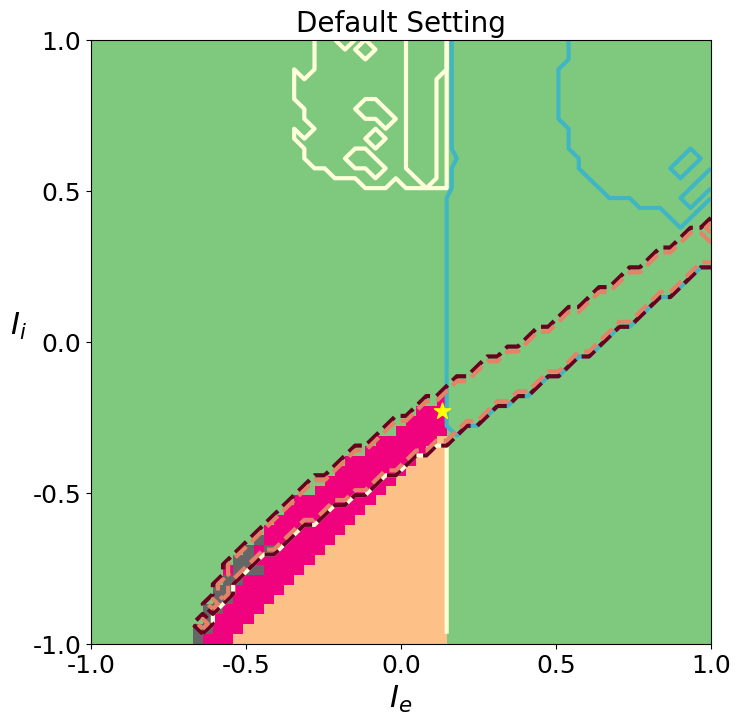

In [4]:
plotDiscreteMap(df_show, xaxis='I_e', yaxis='I_i', scatter=[ee, ii], 
                title = 'Default Setting', colorbar=False)

In [9]:
from params import setParams
from analysis import computeFPs, checkFixPtsStability, a_jkValues, det, tr

sigma = 0.245 #b #2.8550 #a
tau = 2.4201

ee = -0.525
ii = -0.80

params={'I_e': ee, 'I_i': ii, 'end_t': 5000}#, 'sigma_i': sigma, 'tau_i': tau, 'length': 100, 'n': 256}
ps = setParams(params)

fps = computeFPs(ps)

stab = checkFixPtsStability(fps, ps)

a_ee, a_ei, a_ie, a_ii = a_jkValues(fps[0], ps)


l=61
k = np.linspace(-2,2,l)
determinant = det(k, a_ee, a_ei, a_ie, a_ii, ps)
trace = tr(k, a_ee, a_ii, ps)
zero = np.zeros(l)

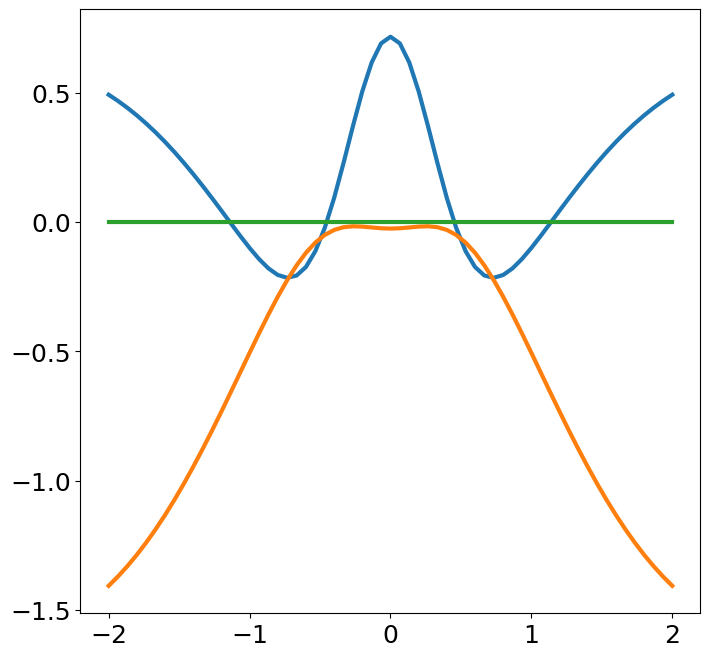

In [10]:
import matplotlib.pyplot as plt

plt.plot(k, determinant, k, trace)
plt.plot(k, zero)

In [109]:
PSD, frequs

(array([1.22619930e-04, 6.39055505e-04, 5.20516176e-04, 2.42940459e-04,
        8.40299071e-05, 1.97630212e-05, 2.57637402e-06, 1.15640726e-06,
        2.08750856e-06, 2.03664724e-06, 1.28559732e-06, 5.66385028e-07,
        1.77820996e-07, 6.51136131e-08, 7.26874365e-08, 9.05079385e-08,
        8.17742475e-08, 5.45277070e-08, 2.76128972e-08, 1.18968130e-08,
        7.29620892e-09, 8.06889311e-09, 8.87250036e-09, 7.62989372e-09,
        5.04931582e-09, 2.68814708e-09, 1.43152389e-09, 1.16447184e-09,
        1.27140912e-09, 1.25349525e-09, 9.90710947e-10, 6.33086034e-10,
        3.62534695e-10, 2.44486607e-10, 2.28875212e-10, 2.31928485e-10,
        2.05506011e-10, 1.51956245e-10, 9.79748931e-11, 6.38539810e-11,
        5.10400657e-11, 4.85332384e-11, 4.52279214e-11, 3.71494610e-11,
        2.67629973e-11, 1.81922351e-11, 1.34059415e-11, 1.15728503e-11,
        1.06770722e-11, 9.31612230e-12, 7.32709807e-12, 5.31973219e-12,
        3.87136231e-12, 3.09896926e-12, 2.72896270e-12, 2.424219